In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326084 entries, 0 to 326083
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   x2       326084 non-null  float64
 1   x3       326084 non-null  float64
 2   x4       326084 non-null  float64
 3   x5       326084 non-null  float64
 4   x6       326084 non-null  float64
 5   x7       326084 non-null  float64
 6   x10      326084 non-null  float64
 7   x12      326084 non-null  float64
 8   x32      326084 non-null  float64
 9   x39      326084 non-null  float64
 10  x47      326084 non-null  float64
 11  x51      326084 non-null  float64
 12  x64      326084 non-null  float64
 13  x65      326084 non-null  float64
 14  x68      326084 non-null  float64
 15  x76      326084 non-null  float64
 16  x85      326084 non-null  float64
 17  x20_log  326084 non-null  float64
dtypes: float64(18)
memory usage: 44.8 MB
None
First few rows of the dataset:
         x2      

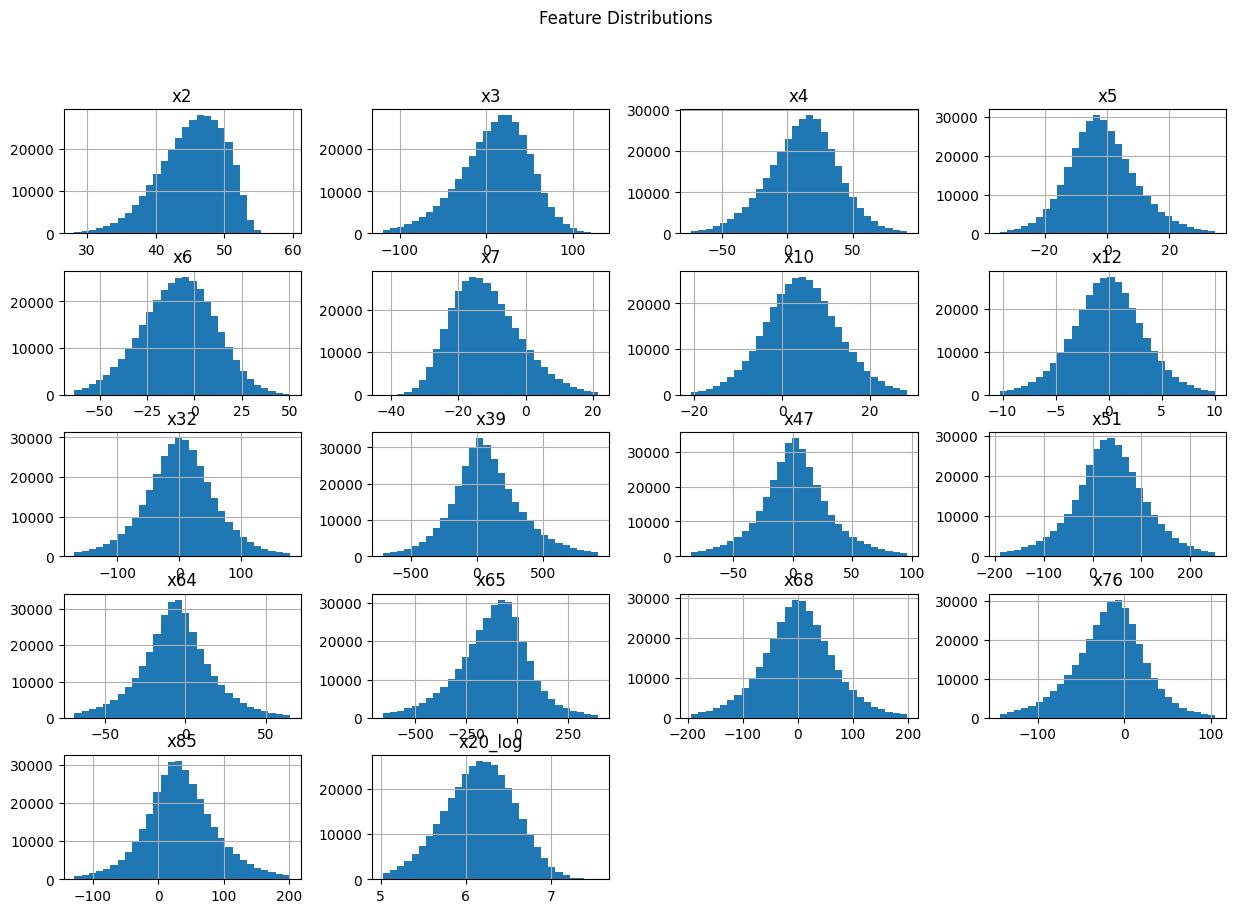

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/RegresiUTSTelkom_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Dataset Structure
print("Dataset Info:")
print(data.info())

# Step 2: Display a few rows
print("First few rows of the dataset:")
print(data.head())

# Step 3: Check for Missing Values
print("Missing values per column:")
print(data.isnull().sum())

# Step 4: Statistical Summary
print("Statistical summary of the dataset:")
print(data.describe())

# Step 5: Distribution of Features
data.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()



*   The dataset contains 326,084 rows and 18 columns.
*   All columns have non-null values, meaning there are no missing data points in any column.
*   The data types for all columns are float64, indicating numerical data.





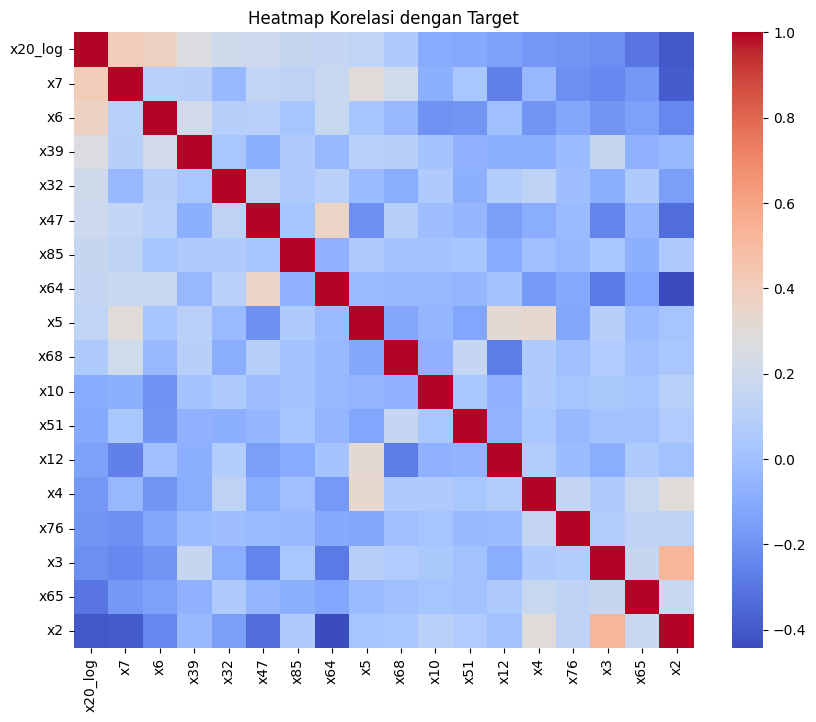

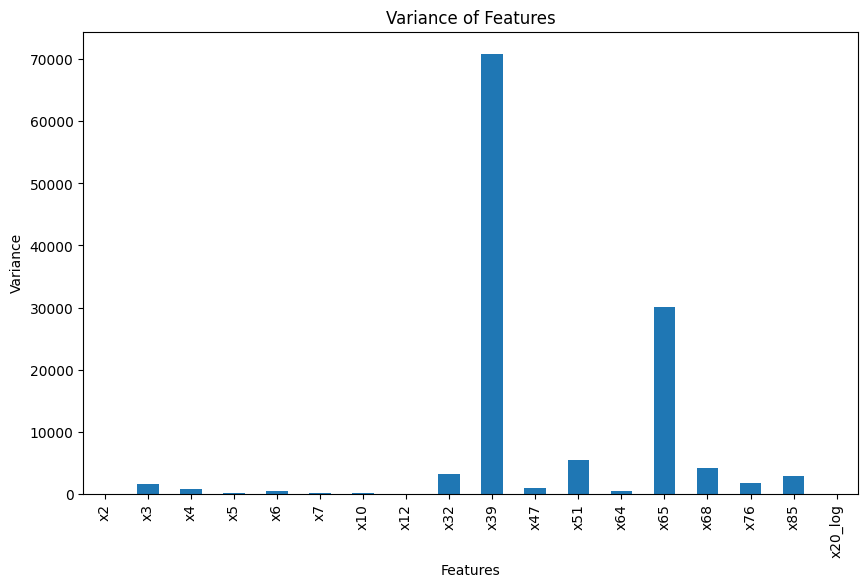

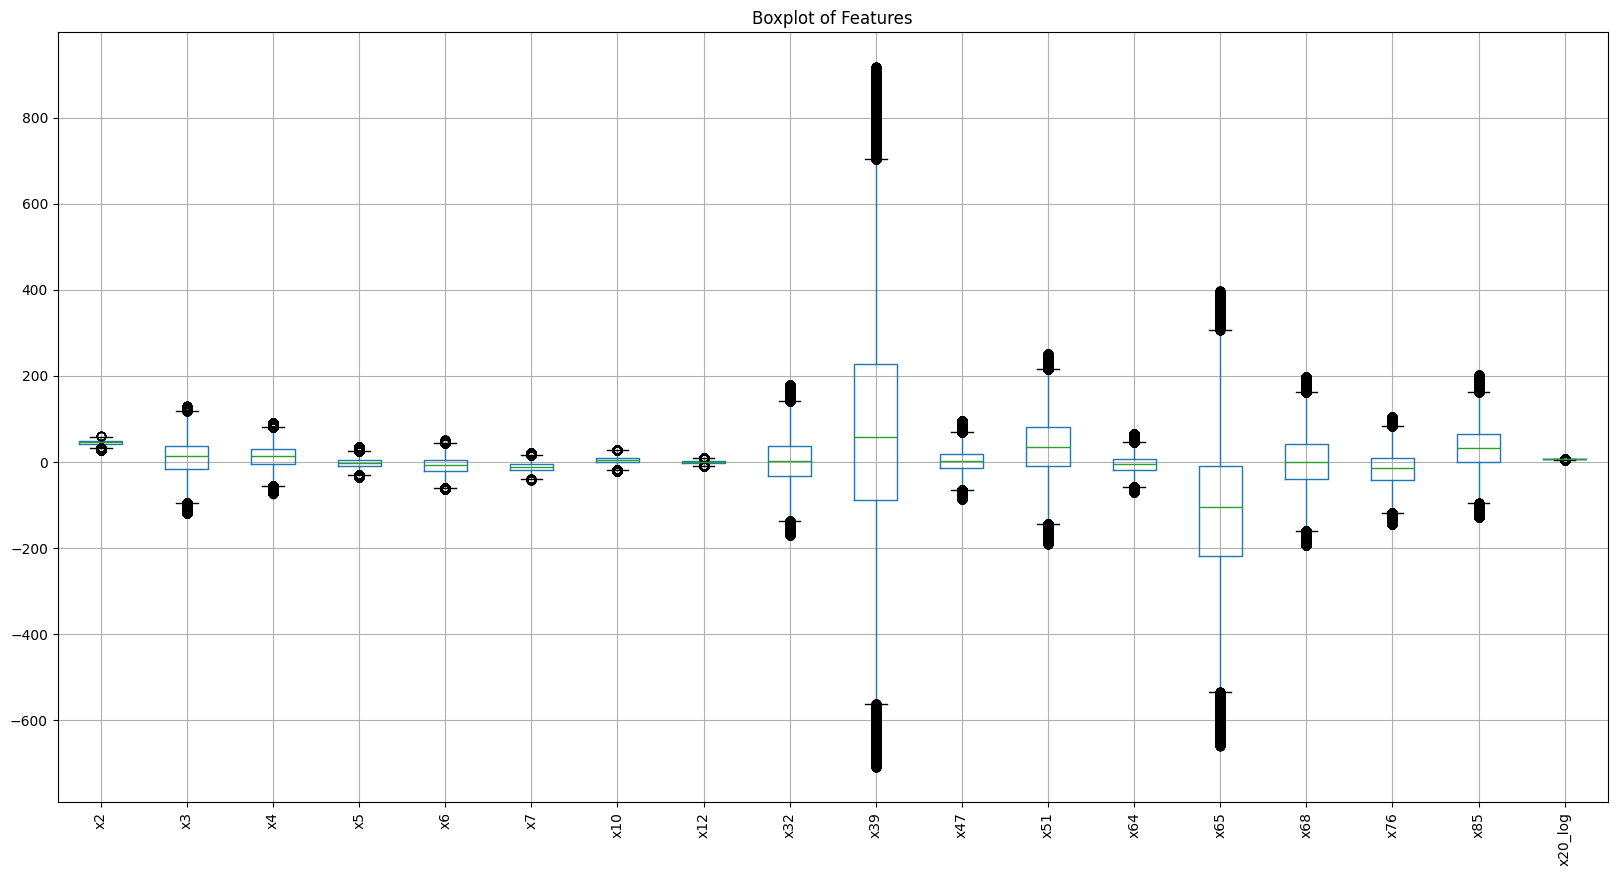

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh jika data memiliki kolom target bernama 'target'
correlation_with_target = data.corr()['x20_log'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(data[correlation_with_target.index].corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi dengan Target")
plt.show()

# Menghitung variansi setiap fitur
variances = data.var()

# Plot variansi
plt.figure(figsize=(10, 6))
variances.plot(kind='bar')
plt.title("Variance of Features")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.show()

data.boxplot(figsize=(20, 10))
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()


calculate the variance of each feature and search for targets

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop(columns=['x20_log'])
y = data['x20_log']
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Pipeline untuk Polynomial Regression
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Pipeline untuk Decision Tree
tree_pipe = Pipeline([
    ('tree', DecisionTreeRegressor())
])

# Pipeline untuk k-Nearest Neighbors
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Pipeline untuk XGBoost Regression
xgb_pipe = Pipeline([
    ('xgb', XGBRegressor(objective='reg:squarederror'))
])


In [ ]:
# Define parameter grids
param_grid_poly = {'poly__degree': [2, 3]}  # Polynomial Regression degree tuning
param_grid_tree = {'tree__max_depth': [5, 10, None]}  # Decision Tree max depth tuning
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 10]}
param_grid_xgb = {'xgb__n_estimators': [100, 200], 'xgb__max_depth': [3, 5, 7]}

# Grid Search untuk masing-masing model
grid_poly = GridSearchCV(poly_pipe, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_tree = GridSearchCV(tree_pipe, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_xgb = GridSearchCV(xgb_pipe, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')


In [ ]:
# Fit setiap model
print("Training Polynomial Regression...")
grid_poly.fit(X_train, y_train)

print("Training Decision Tree...")
grid_tree.fit(X_train, y_train)

print("Training k-Nearest Neighbors...")
grid_knn.fit(X_train, y_train)

print("Training XGBoost Regression...")
grid_xgb.fit(X_train, y_train)

Training Polynomial Regression...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Decision Tree...
Training k-Nearest Neighbors...
Training XGBoost Regression...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constraints=No...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

It can be interpreted that pipelines with XGBRegressor seem to be a promising approach, but preprocessing and model validation steps remain important to ensure optimal results.

In [ ]:
# Function untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("\n")

    return mse, mae, r2

# Evaluasi setiap model dengan parameter terbaik
print("Best Polynomial Regression Model:")
evaluate_model(grid_poly.best_estimator_, X_test, y_test, "Polynomial Regression")

print("Best Decision Tree Model:")
evaluate_model(grid_tree.best_estimator_, X_test, y_test, "Decision Tree")

print("Best k-Nearest Neighbors Model:")
evaluate_model(grid_knn.best_estimator_, X_test, y_test, "k-Nearest Neighbors")

print("Best XGBoost Model:")
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost Regression")

Best Polynomial Regression Model:
Polynomial Regression Performance:
Mean Squared Error (MSE): 0.0727
Mean Absolute Error (MAE): 0.2127
R^2 Score: 0.5619


Best Decision Tree Model:
Decision Tree Performance:
Mean Squared Error (MSE): 0.0873
Mean Absolute Error (MAE): 0.2336
R^2 Score: 0.4736


Best k-Nearest Neighbors Model:
k-Nearest Neighbors Performance:
Mean Squared Error (MSE): 0.0828
Mean Absolute Error (MAE): 0.2276
R^2 Score: 0.5011


Best XGBoost Model:
XGBoost Regression Performance:
Mean Squared Error (MSE): 0.0726
Mean Absolute Error (MAE): 0.2124
R^2 Score: 0.5626




(0.07256525868995382, 0.2124161842728569, 0.5626071522664997)

Evaluate model before tunning hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Helper function to calculate metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Polynomial Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_param_grid = {
    'poly__degree': [2, 3, 4],
    'model__fit_intercept': [True, False]
}
poly_grid = GridSearchCV(poly_pipeline, poly_param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid.fit(X_train, y_train)
poly_best_model = poly_grid.best_estimator_
poly_y_pred = poly_best_model.predict(X_test)
poly_mse, poly_rmse, poly_mae, poly_r2 = evaluate_model(y_test, poly_y_pred)
print("\nBest Polynomial Regression Model Metrics:")
print(f"MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}, MAE: {poly_mae:.4f}, R^2: {poly_r2:.4f}")

# Decision Tree
tree_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)
tree_best_model = tree_grid.best_estimator_
tree_y_pred = tree_best_model.predict(X_test)
tree_mse, tree_rmse, tree_mae, tree_r2 = evaluate_model(y_test, tree_y_pred)
print("\nBest Decision Tree Model Metrics:")
print(f"MSE: {tree_mse:.4f}, RMSE: {tree_rmse:.4f}, MAE: {tree_mae:.4f}, R^2: {tree_r2:.4f}")

# k-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate_model(y_test, knn_y_pred)
print("\nBest k-Nearest Neighbors Model Metrics:")
print(f"MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, R^2: {knn_r2:.4f}")

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_y_pred)
print("\nBest XGBoost Model Metrics:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}")



Best Polynomial Regression Model Metrics:
MSE: 0.0727, RMSE: 0.2696, MAE: 0.2127, R^2: 0.5619

Best Decision Tree Model Metrics:
MSE: 0.0873, RMSE: 0.2955, MAE: 0.2336, R^2: 0.4737

Best k-Nearest Neighbors Model Metrics:
MSE: 0.0818, RMSE: 0.2860, MAE: 0.2259, R^2: 0.5068

Best XGBoost Model Metrics:
MSE: 0.0714, RMSE: 0.2673, MAE: 0.2107, R^2: 0.5694


Result evaluate model after tunning hyperparameter